In [248]:
import openmc
import matplotlib.pyplot as plt
from openmc.deplete import Results
integrator_types = ('predictor', 'cecm')
time_types = ('hours', 'days', 'months')
normalization_types = ('source_rate', 'fission_q')
depletion_types = ('simple', 'full')
chain_files = ('../openmc/tests/chain_simple.xml','chain_endbf71_pwr.xml')

In [262]:
time_type = time_types[0]
integrator_type = integrator_types[0]
normalization_type = normalization_types[1]
depletion_type = depletion_types[0]
chain_file = chain_files[0]

In [263]:
case1_results = Results(f'case1/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')
case2_results = Results(f'case2/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')
case3_results = Results(f'case3/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')

In [264]:
time, _ = case1_results.get_atoms("1", "U235")
chain = openmc.deplete.Chain.from_xml(chain_file)
atoms_dict = {}
for nuc in chain.nuclide_dict:
    atoms = (case1_results.get_atoms("1", nuc)[1], 
             case2_results.get_atoms("1", nuc)[1],
             case3_results.get_atoms("1", nuc)[1])
    atoms_dict[nuc] = atoms

In [267]:
atoms_dict.keys()

dict_keys(['I135', 'Xe135', 'Xe136', 'Cs135', 'Gd157', 'Gd156', 'U234', 'U235', 'U238'])

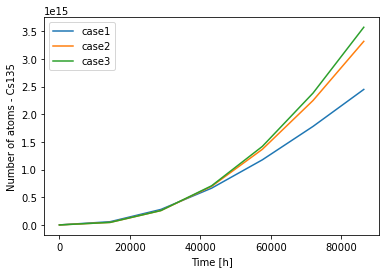

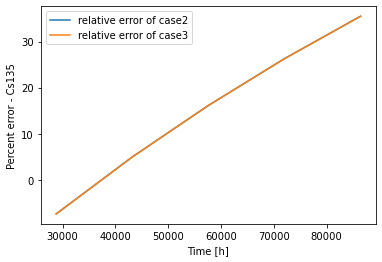

In [278]:
nuc = 'Cs135'
c1_atoms, c2_atoms, c3_atoms = atoms_dict[nuc]
plt.figure()
plt.plot(time, c1_atoms, label="case1")
plt.plot(time, c2_atoms, label="case2")
plt.plot(time, c3_atoms, label="case3")
plt.xlabel("Time [h]")
plt.ylabel(f"Number of atoms - {nuc}");
plt.legend()

plt.figure()
error21 = 100 * (c2_atoms - c1_atoms) / c1_atoms
error31 = 100 * (c3_atoms - c1_atoms) / c1_atoms
plt.plot(time[2:], error21[2:], label="relative error of case2")
plt.plot(time[2:], error21[2:], label="relative error of case3")
plt.xlabel("Time [h]")
plt.ylabel(f"Percent error - {nuc}")
plt.legend()



In [279]:
c1_atoms

array([5.54176944e+02, 5.82113892e+13, 2.79875769e+14, 6.64151448e+14,
       1.17647166e+15, 1.78110403e+15, 2.44916421e+15])

In [276]:
c2_atoms

array([0.00000000e+00, 9.47932674e+14, 1.89581294e+15, 2.84364081e+15,
       3.79141627e+15, 4.73913933e+15, 5.68680999e+15])

In [277]:
c3_atoms

array([0.00000000e+00, 9.47932674e+14, 1.89581294e+15, 3.17850432e+15,
       4.45307328e+15, 5.72381017e+15, 6.98990481e+15])